In [1]:
import wandb
api = wandb.Api()

In [17]:
SGD_3EXP = "/daniyarzt/ETH-DL-Project/runs/6lg2voiv"
PREV_BULK_SGD_3EXP = "/daniyarzt/ETH-DL-Project/runs/dultnuk2"
PREV_BULK_SGD_5EXP_1STBULKONLY = "/daniyarzt/ETH-DL-Project/runs/x1fofqqg"
SGD_5EXP = "/daniyarzt/ETH-DL-Project/runs/rtxv5js4"
PREV_BULK_SGD_5EXP = "/daniyarzt/ETH-DL-Project/runs/9jop7n4i"
PREV_BULK_SGD_5EXP_AVERAGED = "/daniyarzt/ETH-DL-Project/runs/otaqu3h3"
PREV_BULK_SGD_5EXP_AVERAGED_OVERLAPS = "/daniyarzt/ETH-DL-Project/runs/bfcrmmlj"
EWC_5EXP = "/daniyarzt/ETH-DL-Project/runs/2ibeu9pc"
AGEM_5EXP = "/daniyarzt/ETH-DL-Project/runs/ui23swgv"

In [18]:

def get_history(api, path):
    run = api.run(path)
    return run.scan_history()

def get_list_history(history):
    result = {
        'training_step' : [],
        'exp_switches' : []
    }
    cur_training_step = 0
    training_step_add = 0
    for record in history:
        for key, value in record.items():
            if value is None:
                continue
            if key[0] == '_':
                continue

            if key == 'training_step':
                if value == 0:
                    training_step_add += cur_training_step
                    cur_training_step = 0
                    result['exp_switches'].append(training_step_add)
                else:
                    cur_training_step = value
                result['training_step'].append(cur_training_step + training_step_add)
            elif key == 'top_overlap':
                if not key in result:
                    result[key] = []
                result[key].append((cur_training_step + training_step_add, value))
            else:
                if not key in result:
                    result[key] = []
                result[key].append(value)
    return result

def inspect_results(results):
    for key, value in results.items():
        print(f'Metric: {key} with {len(value)} items.')

In [7]:
sgd_3exp_results = get_list_history(get_history(api, SGD_3EXP))
prev_bulk_sgd_3exp_results = get_list_history(get_history(api, PREV_BULK_SGD_3EXP))
sgd_5exp_results = get_list_history(get_history(api, SGD_5EXP))
prev_bulk_sgd_5exp_1stbulkonly_results = get_list_history(get_history(api, PREV_BULK_SGD_5EXP_1STBULKONLY))
prev_bulk_sgd_5exp_resutls = get_list_history(get_history(api, PREV_BULK_SGD_5EXP))
prev_bulk_sgd_5exp_averaged_results = get_list_history(get_history(api, PREV_BULK_SGD_5EXP_AVERAGED))


In [8]:
prev_bulk_sgd_5exp_averaged__overlaps_results = get_list_history(get_history(api, PREV_BULK_SGD_5EXP_AVERAGED_OVERLAPS))

In [19]:
ewc_5exp_results = get_list_history(get_history(api, EWC_5EXP))
agem_5exp_results = get_list_history(get_history(api, AGEM_5EXP))

In [6]:
inspect_results(ewc_5exp_results)

Metric: training_step with 14070 items.
Metric: exp_switches with 0 items.
Metric: exp_0_accuracy with 4690 items.
Metric: exp_1_accuracy with 3752 items.
Metric: exp_2_accuracy with 2814 items.
Metric: exp_3_accuracy with 1876 items.
Metric: exp_4_accuracy with 938 items.


In [12]:
inspect_results(prev_bulk_sgd_5exp_averaged__overlaps_results)

Metric: training_step with 4690 items.
Metric: exp_switches with 5 items.
Metric: loss_mb with 4690 items.
Metric: exp_0_accuracy with 4690 items.
Metric: loss with 5 items.
Metric: exp_1_accuracy with 3752 items.
Metric: top_overlap with 10 items.
Metric: exp_2_accuracy with 2814 items.
Metric: exp_3_accuracy with 1876 items.
Metric: exp_4_accuracy with 938 items.


[0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008, 3072, 3136, 3200, 3264, 3328, 3392, 3456, 3520, 3584, 3648, 3712, 3776, 3840, 3904, 3968, 4032, 4096, 4160, 4224, 4288, 4352, 4416, 4480, 4544, 4608, 4672, 4736, 4800, 4864, 4928, 4992, 5056, 5120, 5184, 5248, 5312, 5376, 5440, 5504, 5568, 5632, 5696, 5760, 5824, 5888, 5952, 6016, 6080, 6144, 6208, 6272, 6336, 6400, 6464, 6528, 6592, 6656, 6720, 6784, 6848, 6912, 6976, 7040, 7104, 7168, 7232, 7296, 7360, 7424, 7488, 7552, 7616, 7680, 7744, 7808, 7872, 7936, 8000, 8064, 8128, 8192, 8256, 8320, 8384, 8448, 8512, 8576, 8640, 8704, 8768, 8832, 8896, 8960, 9024, 9088, 9152, 9216, 9280, 9344, 9408, 9472, 9536, 9600, 9664, 9728, 9792, 9856, 9920, 9984, 10048, 10112, 10176, 10240, 10304, 10368, 10432, 10496, 10560, 10624, 10688,

### Simple comparison on 3 tasks

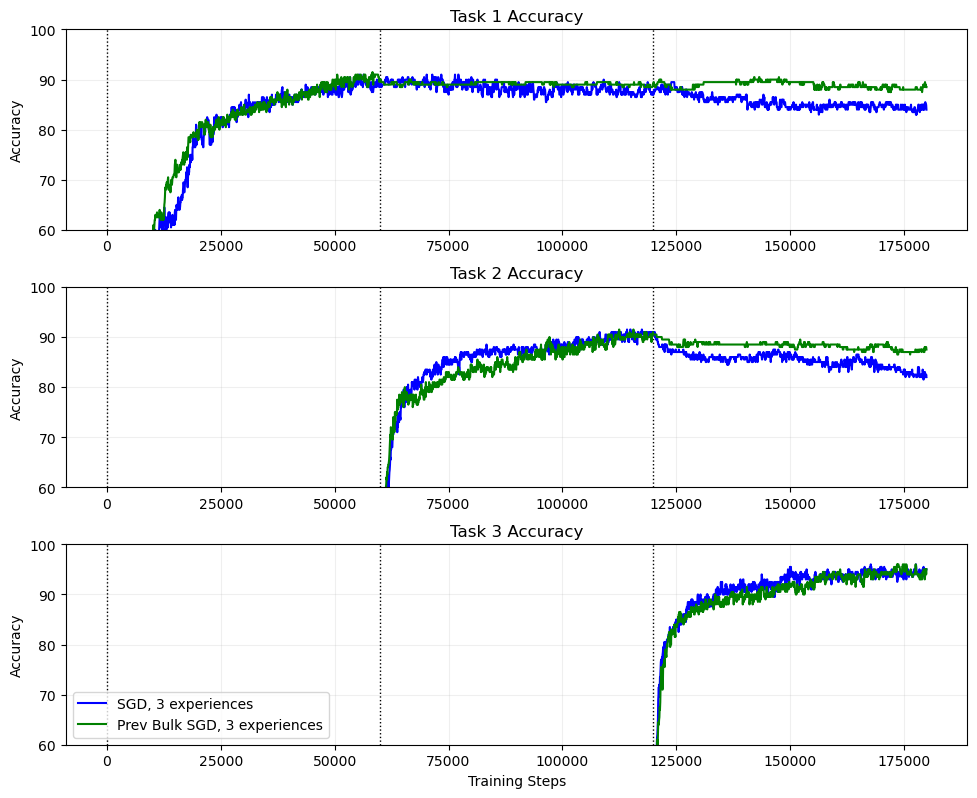

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data

results = [sgd_3exp_results, prev_bulk_sgd_3exp_results]
colors = ['blue', 'green']
names = ['SGD, 3 experiences', 'Prev Bulk SGD, 3 experiences']

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
fig.tight_layout(pad=2.0)


exp_switches = sgd_3exp_results['exp_switches']

# Add vertical lines
for ax in [ax1, ax2, ax3]:
    for x in exp_switches:
        ax.axvline(x, color='black', linestyle=':', linewidth=1)
    ax.set_ylim(60., 100.)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.set_ylabel('Accuracy')   
    # ax.set_xlim(0, 180000)

# Plot for each task
for i, (result, color, name) in enumerate(zip(results, colors, names)):
    # Task 1
    
    ax1.plot(result['training_step'], result['exp_0_accuracy'], color=color, label=name)
    # ax1.fill_between(steps, data1-0.02, data1+0.02, color=color, alpha=0.2)
    
    # Task 2
    exp1_len = len(result['exp_1_accuracy'])
    ax2.plot(result['training_step'][-exp1_len:], result['exp_1_accuracy'], color=color, label=name)
    # ax2.fill_between(steps, data2-0.02, data2+0.02, color=color, alpha=0.2)
    
    # Task 3
    exp_2_len = len(result['exp_2_accuracy'])
    ax3.plot(result['training_step'][-exp_2_len:], result['exp_2_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

# Additional formatting
ax3.set_xlabel('Training Steps')
ax3.legend(loc='lower left')

# Set titles
ax1.set_title('Task 1 Accuracy')
ax2.set_title('Task 2 Accuracy')
ax3.set_title('Task 3 Accuracy')

plt.show()

### Trying to store only 1st bulk space

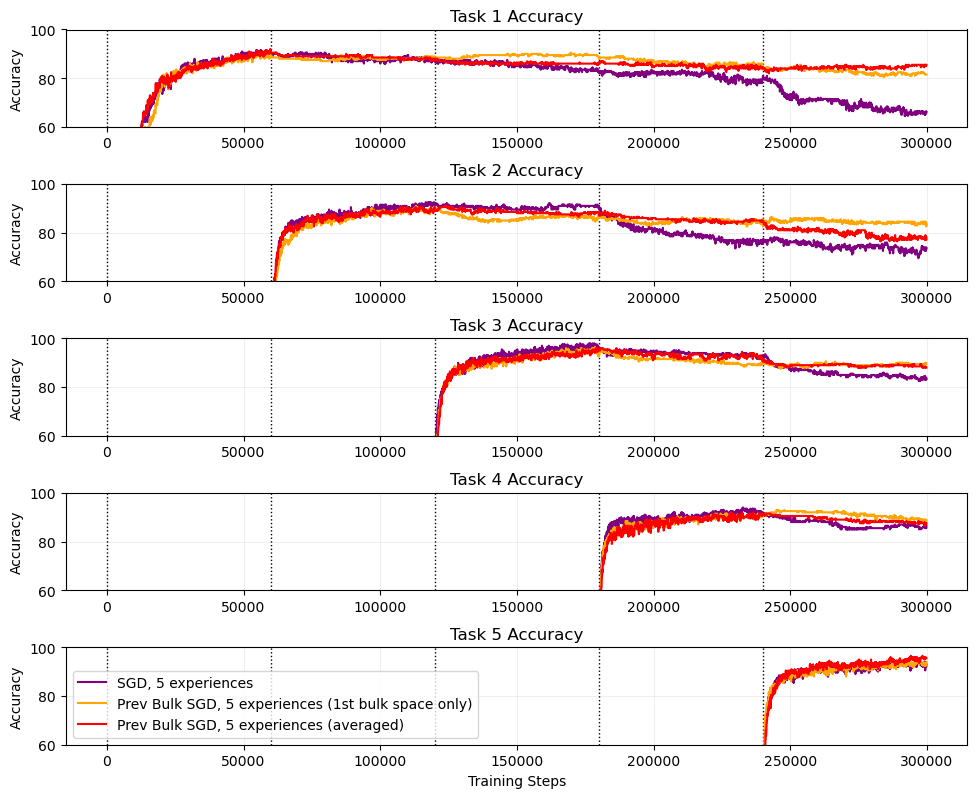

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data

results = [sgd_5exp_results, prev_bulk_sgd_5exp_1stbulkonly_results, prev_bulk_sgd_5exp_averaged_results]
colors = ['purple', 'orange', 'red']
names = ['SGD, 5 experiences', 'Prev Bulk SGD, 5 experiences (1st bulk space only)', 'Prev Bulk SGD, 5 experiences (averaged)']

# Create figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 8))
fig.tight_layout(pad=2.0)


exp_switches = sgd_5exp_results['exp_switches']

# Add vertical lines
for ax in [ax1, ax2, ax3, ax4, ax5]:
    for x in exp_switches:
        ax.axvline(x, color='black', linestyle=':', linewidth=1)
    ax.set_ylim(60., 100.)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.set_ylabel('Accuracy')   
    # ax.set_xlim(0, 180000)

# Plot for each task
for i, (result, color, name) in enumerate(zip(results, colors, names)):
    # Task 1
    
    ax1.plot(result['training_step'], result['exp_0_accuracy'], color=color, label=name)
    # ax1.fill_between(steps, data1-0.02, data1+0.02, color=color, alpha=0.2)
    
    # Task 2
    exp1_len = len(result['exp_1_accuracy'])
    ax2.plot(result['training_step'][-exp1_len:], result['exp_1_accuracy'], color=color, label=name)
    # ax2.fill_between(steps, data2-0.02, data2+0.02, color=color, alpha=0.2)
    
    # Task 3
    exp_2_len = len(result['exp_2_accuracy'])
    ax3.plot(result['training_step'][-exp_2_len:], result['exp_2_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 4
    exp_3_len = len(result['exp_3_accuracy'])
    ax4.plot(result['training_step'][-exp_3_len:], result['exp_3_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 5
    exp_4_len = len(result['exp_4_accuracy'])
    ax5.plot(result['training_step'][-exp_4_len:], result['exp_4_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

# Additional formatting
ax5.set_xlabel('Training Steps')
ax5.legend(loc='lower left')

# Set titles
ax1.set_title('Task 1 Accuracy')
ax2.set_title('Task 2 Accuracy')
ax3.set_title('Task 3 Accuracy')
ax4.set_title('Task 4 Accuracy')
ax5.set_title('Task 5 Accuracy')

plt.show()

### Looking at the normal Prev.Bulk.SGD


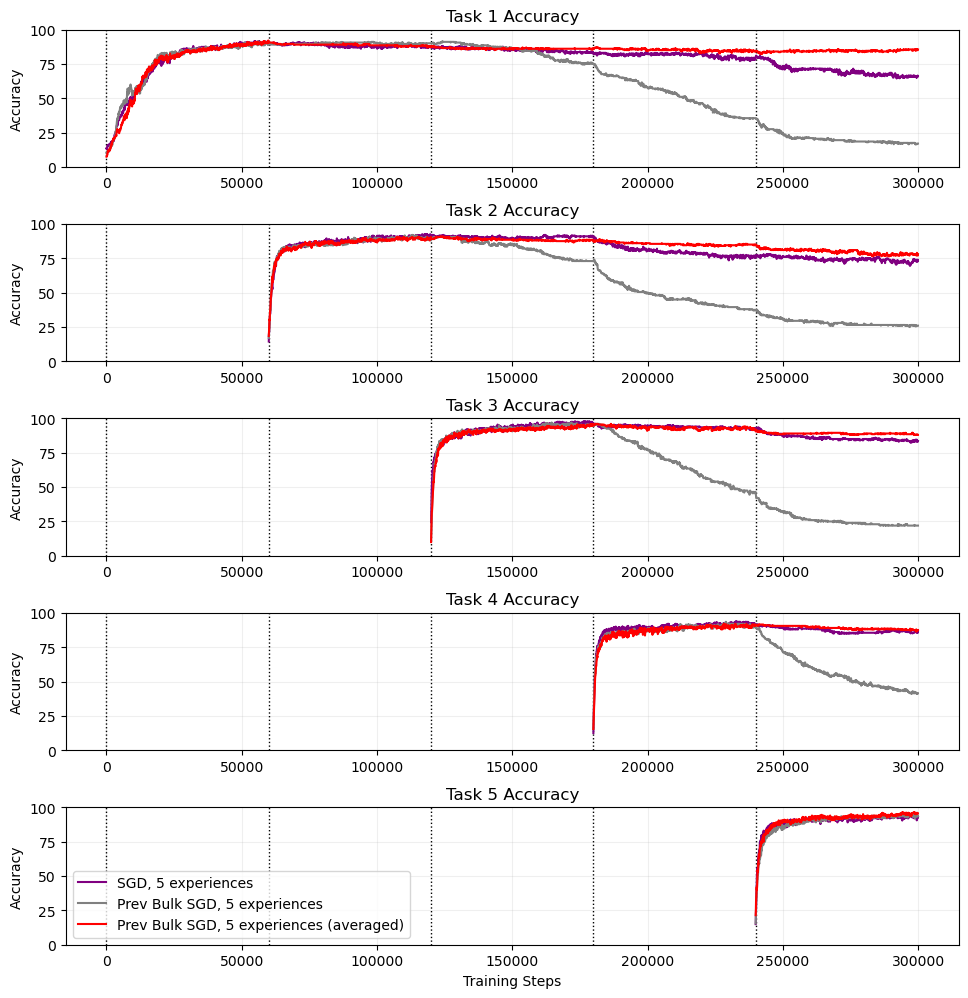

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data

results = [sgd_5exp_results, prev_bulk_sgd_5exp_resutls, prev_bulk_sgd_5exp_averaged_results]
colors = ['purple', 'grey', 'red']
names = ['SGD, 5 experiences', 'Prev Bulk SGD, 5 experiences', 'Prev Bulk SGD, 5 experiences (averaged)']

# Create figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 10))
fig.tight_layout(pad=2.0)


exp_switches = sgd_5exp_results['exp_switches']

# Add vertical lines
for ax in [ax1, ax2, ax3, ax4, ax5]:
    for x in exp_switches:
        ax.axvline(x, color='black', linestyle=':', linewidth=1)
    ax.set_ylim(0., 100.)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.set_ylabel('Accuracy')   
    # ax.set_xlim(0, 180000)

# Plot for each task
for i, (result, color, name) in enumerate(zip(results, colors, names)):
    # Task 1
    
    ax1.plot(result['training_step'], result['exp_0_accuracy'], color=color, label=name)
    # ax1.fill_between(steps, data1-0.02, data1+0.02, color=color, alpha=0.2)
    
    # Task 2
    exp1_len = len(result['exp_1_accuracy'])
    ax2.plot(result['training_step'][-exp1_len:], result['exp_1_accuracy'], color=color, label=name)
    # ax2.fill_between(steps, data2-0.02, data2+0.02, color=color, alpha=0.2)
    
    # Task 3
    exp_2_len = len(result['exp_2_accuracy'])
    ax3.plot(result['training_step'][-exp_2_len:], result['exp_2_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 4
    exp_3_len = len(result['exp_3_accuracy'])
    ax4.plot(result['training_step'][-exp_3_len:], result['exp_3_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 5
    exp_4_len = len(result['exp_4_accuracy'])
    ax5.plot(result['training_step'][-exp_4_len:], result['exp_4_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

# Additional formatting
ax5.set_xlabel('Training Steps')
ax5.legend(loc='lower left')

# Set titles
ax1.set_title('Task 1 Accuracy')
ax2.set_title('Task 2 Accuracy')
ax3.set_title('Task 3 Accuracy')
ax4.set_title('Task 4 Accuracy')
ax5.set_title('Task 5 Accuracy')

plt.show()

### Subseuqent overlaps


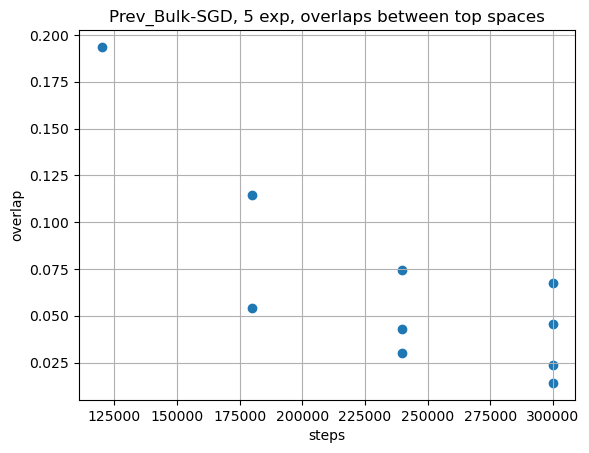

In [114]:
overlaps = prev_bulk_sgd_5exp_averaged__overlaps_results['top_overlap']

x, y = zip(*overlaps)

plt.scatter(x, y)
plt.xlabel("steps")
plt.ylabel("overlap")
plt.title("Prev_Bulk-SGD, 5 exp, overlaps between top spaces")
plt.grid(True)

# Comparing to other CL baselines


In [21]:
ewc_5exp_results['training_step'] = sgd_5exp_results['training_step']
agem_5exp_results['training_step'] = sgd_5exp_results['training_step']

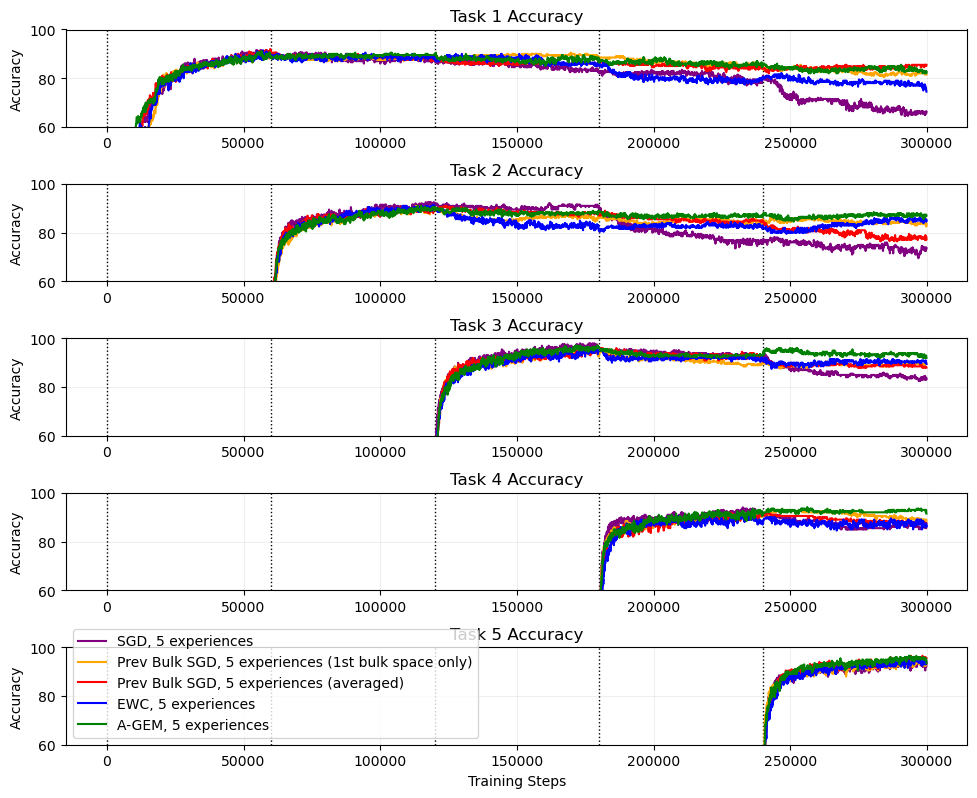

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data

results = [sgd_5exp_results, prev_bulk_sgd_5exp_1stbulkonly_results, prev_bulk_sgd_5exp_averaged_results, ewc_5exp_results, agem_5exp_results]
colors = ['purple', 'orange', 'red', 'blue', 'green']
names = ['SGD, 5 experiences', 'Prev Bulk SGD, 5 experiences (1st bulk space only)', 'Prev Bulk SGD, 5 experiences (averaged)', 'EWC, 5 experiences', 'A-GEM, 5 experiences']

# Create figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 8))
fig.tight_layout(pad=2.0)


exp_switches = sgd_5exp_results['exp_switches']

# Add vertical lines
for ax in [ax1, ax2, ax3, ax4, ax5]:
    for x in exp_switches:
        ax.axvline(x, color='black', linestyle=':', linewidth=1)
    ax.set_ylim(60., 100.)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.set_ylabel('Accuracy')   
    # ax.set_xlim(0, 180000)

# Plot for each task
for i, (result, color, name) in enumerate(zip(results, colors, names)):
    # Task 1
    
    ax1.plot(result['training_step'], result['exp_0_accuracy'], color=color, label=name)
    # ax1.fill_between(steps, data1-0.02, data1+0.02, color=color, alpha=0.2)
    
    # Task 2
    exp1_len = len(result['exp_1_accuracy'])
    ax2.plot(result['training_step'][-exp1_len:], result['exp_1_accuracy'], color=color, label=name)
    # ax2.fill_between(steps, data2-0.02, data2+0.02, color=color, alpha=0.2)
    
    # Task 3
    exp_2_len = len(result['exp_2_accuracy'])
    ax3.plot(result['training_step'][-exp_2_len:], result['exp_2_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 4
    exp_3_len = len(result['exp_3_accuracy'])
    ax4.plot(result['training_step'][-exp_3_len:], result['exp_3_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

    # Task 5
    exp_4_len = len(result['exp_4_accuracy'])
    ax5.plot(result['training_step'][-exp_4_len:], result['exp_4_accuracy'], color=color, label=name)
    # ax3.fill_between(steps, data3-0.02, data3+0.02, color=color, alpha=0.2)

# Additional formatting
ax5.set_xlabel('Training Steps')
ax5.legend(loc='lower left')

# Set titles
ax1.set_title('Task 1 Accuracy')
ax2.set_title('Task 2 Accuracy')
ax3.set_title('Task 3 Accuracy')
ax4.set_title('Task 4 Accuracy')
ax5.set_title('Task 5 Accuracy')

plt.show()